# **Telco Customer Churn Analysis**

### **Business Problem Understanding**

**Context**

Perusahaan telekomunikasi mengahadapi tantangan besar dalam mempertahankan pelanggan merka. Kehilangan pelanggan (customer churn) dapat berdampak signifikan pada pendapatan dan pertumbuhan bisnis, terutama karena biaya untuk mendapatkan pelanggan baru umumnya lebih tinggi dibandingkan dengan mempertahankan pelanggan lama. Oleh karena itu, untuk memahami faktor-faktor yang menyebabkan pelanggan berhenti berlangganan sangat penting agar perusahaan dapat mengambil tindakan preventif. 

**Churn**
* tidak / 0: pelanggan tetap menggunakan layanan dari perusahaan saat ini.
* ya / 1: pelanggan berhenti menggunakan layanan dari perusahaan saat ini.

**Problem Statement**

Perusahaan ingin mengurangi tingkat churn pelanggan yang semakin meningkat dari waktu ke waktu. Namun, belum memiliki sitem yang mampu:
* Mengidentifikasi pelanggan yang beresiko tinggi untuk berhenti berlangganan.
* Memahami faktor-faktor apa saja yang mempengaruhi keputusan pelanggan untuk churn.
* Menyusun trategi retensi berdasarkan profil pelanggan.

Tanpa pemahaman yang tepat dan sistem yang efektif, perusahaan beresiko kehilangan lebih banyak pelanggan, mengalami penurunan pendapatan, dan mengeluarkan biaya lebih besar untuk mendapatkan pelanggan baru.

**Goals**
* Memprediksi apakah seorang pelanggan akan churn atau tidak berdasarkan data hitoris mereka.
* Mengidentifikasi variabel-variabel yang paling berpengaruh terhadap kemunginan pelanggan churn.
* Memberikan rekomendasi strategis untuk mempertahankan pelanggan beresiko tinggi agar tidak meninggalkan layanan.

**Analytic Approach**

Untuk mencapai tujuan tersebut, pendekatan analitik dan machine learning akan digunakan, dengan langkah-langkah sebagai berikut:
1. Eksplorasi dan pemahaman data pelanggan.
2. Pemodelan prediktif churn menggunakan algoritma klasifikasi.
3. Interpretasi hasil model untuk mendapatkan insight yang dapat ditindaklanjuti oleh tim bisnis.

**Metrics Evaluation**
* **False Positive**: model memprediksi seorang pelanggan akan churn, padahal sebenarnya tidak. Meskipun bisa menyebabkan pengeluaran yang tidak perlu untuk strategi retensi, dampaknya masih bisa diterima.
* **False Negative**: model memprediksi pelanggan tidak akan churn, padahal pelanggan tersebut sebenarnya akan berhenti. Ini lebih beresiko karena perusahaan kehilangan kesempatan untuk melakuakn intervensi retensi dan pada akhirnya kehilangan pendapatan. 

Dalam kasus ini, churn prediction, false negative lebih berbahata karena berpotensu menyebabkan kerugian langsung akibat kehilangan pelanggan yang seharusnya dapat dipertahankan melalui strategi yang tepat.

### **Data Understanding**

**Deskripsi Umum Dataset**

Dataset ini berisi informasi pelanggan dari sebuah perusahaan telekomunikasi layanan internet dan telepon. Setiap baris merepresentasikan satu pelanggan, dan kolom-kolomnya berisi data demografis, informasi layanan yang digunakan, serta status apakah pelanggan tersebut churn (berhenti berlangganan) atau tidak. Data set ini digunakan untuk menganalisis dan memprediksi perilaku churn pelanggan. 

**Fitur-fitur Utama**

Berikut adalah beberapa kolom penting yang umum ditemukan dalam dataset ini:
| Nama Fitur           | Tipe Data    | Deskripsi                                                                                             |
|----------------------|--------------|---------------------------------------------------------------------------------------------------------|
| **Dependents**       | Kategori     | Menunjukkan apakah pelanggan memiliki tanggungan (misalnya anak, anggota keluarga lainnya).           |
| **Tenure**           | Numerik      | Lama waktu (dalam bulan) pelanggan telah menggunakan layanan dari perusahaan.                         |
| **OnlineSecurity**   | Kategori     | Menunjukkan apakah pelanggan menggunakan layanan keamanan online atau tidak.                          |
| **OnlineBackup**     | Kategori     | Menunjukkan apakah pelanggan menggunakan layanan pencadangan data (backup) online.                    |
| **InternetService**  | Kategori     | Jenis layanan internet yang digunakan pelanggan (misalnya DSL, Fiber optic, atau tidak berlangganan). |
| **DeviceProtection** | Kategori     | Menunjukkan apakah pelanggan menggunakan layanan perlindungan perangkat.                              |
| **TechSupport**      | Kategori     | Menunjukkan apakah pelanggan memiliki akses ke layanan dukungan teknis.                               |
| **Contract**         | Kategori     | Jenis kontrak yang dipilih pelanggan, misalnya per bulan, satu tahun, atau dua tahun.                 |
| **PaperlessBilling** | Kategori     | Menunjukkan apakah tagihan dikirim dalam bentuk digital tanpa kertas.                                 |
| **MonthlyCharges**   | Numerik      | Jumlah biaya yang dibayarkan pelanggan setiap bulan untuk layanan yang digunakan.                     |
| **Churn**            | Target (0/1) | Status apakah pelanggan berhenti berlangganan (**Ya** = churn, **Tidak** = tetap menjadi pelanggan).  |



# **Libraries & Load Dataset**

### **Libraries**

In [1]:
# library
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# feature engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# untuk pemodelan
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE

# imbalance dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# pickle
import pickle

# ignore warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# atur kolom maksimal
pd.set_option('display.max_columns', None)

### **Load Dataset**

In [2]:
# load dataset
df = pd.read_csv('data_telco_customer_churn.csv')
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


# **Exploratory Data Analysis**

### **Cleaning**

In [3]:
# cek bentuk awal data
df.shape

(4930, 11)

In [4]:
# informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [5]:
# cek missing value
df.isnull().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

terlihat dataset tidak memiliki missing value.

In [6]:
# deskripsi data
df.describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


In [7]:
# cek duplicate
print("\nChecking for Duplicates:", df.duplicated().sum())


Checking for Duplicates: 77


In [8]:
# drop duplicate
df = df.drop_duplicates()
print('Data duplikat berhasil dihapus! Data duplikat: ', df.duplicated().sum())

Data duplikat berhasil dihapus! Data duplikat:  0


In [9]:
# cek nilai unik 
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].unique()])

dfDesc = pd.DataFrame(columns=['Data Features', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
dfDesc

,Data Features,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1..."
2,OnlineSecurity,3,"[No, Yes, No internet service]"
3,OnlineBackup,3,"[No, Yes, No internet service]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,3,"[Yes, No internet service, No]"
6,TechSupport,3,"[Yes, No, No internet service]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7,..."


In [10]:
# cek informasi dataframenya
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(min(3, df[col].nunique())).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[No, Yes]"
1,tenure,int64,0,0.0,73,"[60, 54, 62]"
2,OnlineSecurity,object,0,0.0,3,"[No, Yes, No internet service]"
3,OnlineBackup,object,0,0.0,3,"[No internet service, Yes, No]"
4,InternetService,object,0,0.0,3,"[Fiber optic, No, DSL]"
5,DeviceProtection,object,0,0.0,3,"[Yes, No internet service, No]"
6,TechSupport,object,0,0.0,3,"[Yes, No, No internet service]"
7,Contract,object,0,0.0,3,"[One year, Two year, Month-to-month]"
8,PaperlessBilling,object,0,0.0,2,"[No, Yes]"
9,MonthlyCharges,float64,0,0.0,1422,"[50.1, 84.75, 84.55]"


Memiliki nilai `No internet service` sebenarnya berarti pelanggan tersebut tidak memiliki internet, bukan bahwa mereka memilih untuk tidak menggunakan layanan tersebut. Jika membiarkan ini, maka OneHotEncoder akan memperlakukannya sebagai kelas yang setara. Maka, gabungkan nilai `No internet service` menjadi `No` di fitur-fitur layanan tambahan, karena secara semantik artinya sama.

In [11]:
internet_related_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'
]

for col in internet_related_cols:
    df[col] = df[col].replace({'No internet service': 'No'})

**summary:** tidak ada missing value, data yang duplikat dihapus, dan nilai seperti `No internet service` digaungkan ke nlai `No` agar mempermudah proses encoding.

### **Outlier handling**

**cek outlier untuk data numerikal, yaitu `tenure` dan `MonthlyCharges`**

Jumlah outlier di `tenure`: 0


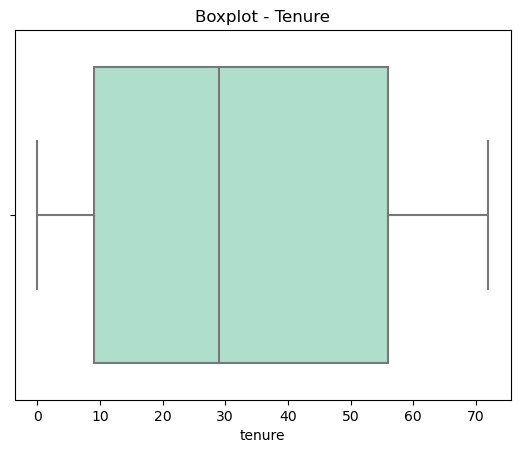

In [12]:
# cek outlier untuk `tenure`
Q1_tenure = df['tenure'].quantile(0.25)
Q3_tenure = df['tenure'].quantile(0.75)
IQR_tenure = Q3_tenure - Q1_tenure
lower_bound_tenure = Q1_tenure - 1.5 * IQR_tenure
upper_bound_tenure = Q3_tenure + 1.5 * IQR_tenure

outlier_tenure = df[(df['tenure'] < lower_bound_tenure) | (df['tenure'] > upper_bound_tenure)]
print(f'Jumlah outlier di `tenure`: {len(outlier_tenure)}')

# visualisasi
sns.boxplot(x = df['tenure'], color='#A8E6CF')
plt.title('Boxplot - Tenure')
plt.show()

Jumlah outlier di `MonthlyCharges`: 0


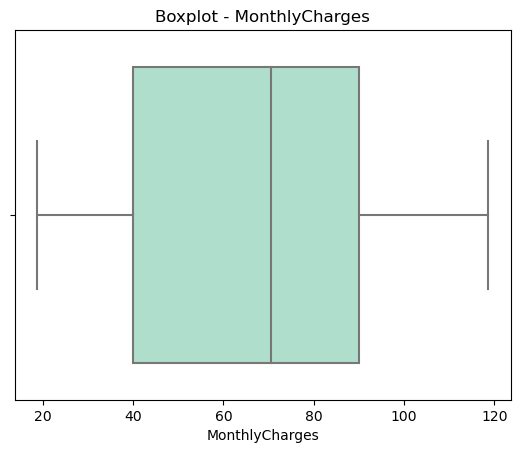

In [13]:
# cek outlier untuk `MonthlyCharges`
Q1_MonthlyCharges = df['MonthlyCharges'].quantile(0.25)
Q3_MonthlyCharges = df['MonthlyCharges'].quantile(0.75)
IQR_MonthlyCharges = Q3_MonthlyCharges - Q1_MonthlyCharges
lower_bound_MonthlyCharges = Q1_MonthlyCharges - 1.5 * IQR_MonthlyCharges
upper_bound_MonthlyCharges = Q3_MonthlyCharges + 1.5 * IQR_MonthlyCharges

outlier_MonthlyCharges = df[(df['MonthlyCharges'] < lower_bound_MonthlyCharges) | (df['MonthlyCharges'] > upper_bound_MonthlyCharges)]
print(f'Jumlah outlier di `MonthlyCharges`: {len(outlier_MonthlyCharges)}')

# visualisasi
sns.boxplot(x = df['MonthlyCharges'], color='#A8E6CF')
plt.title('Boxplot - MonthlyCharges')
plt.show()

**summary:** tidak ada outlier di kedua data numerikal.

### **Distribusi Churn**

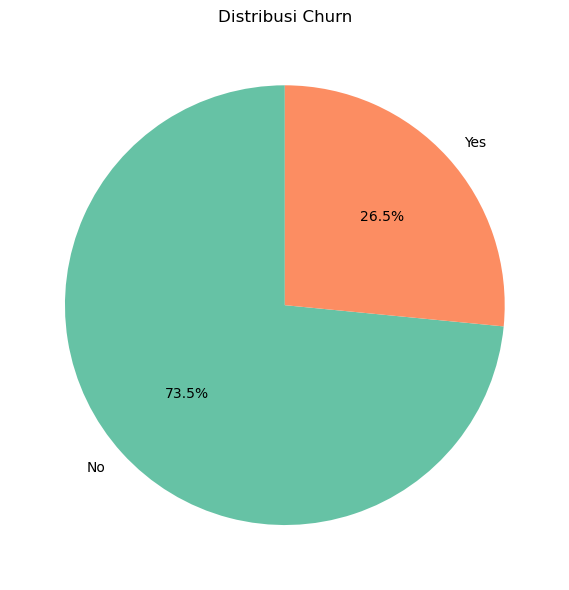

In [14]:
# Hitung persentase churn
churn_percent = df['Churn'].value_counts(normalize=True) * 100

# Visualisasi dengan pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_percent, labels=churn_percent.index, autopct='%1.1f%%', colors=sns.color_palette('Set2', n_colors=len(churn_percent)), startangle=90)
plt.title('Distribusi Churn')
plt.tight_layout()
plt.show()

bisa dilihat bahwa distribus churn tidak seimbang antara yang tidak churn dan yang churn. Maka dari itu, akan dilihat bagaimana distribusi setiap fitur dengan churn.

### **Features vs Churn Distribution**

In [15]:
# kolom kategori
kolom_kategorikal = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 
                  'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']

# kolom numerikal
kolom_numerikal = ['tenure', 'MonthlyCharges']

**distribusi setiap fitur numerikal dengan churn**

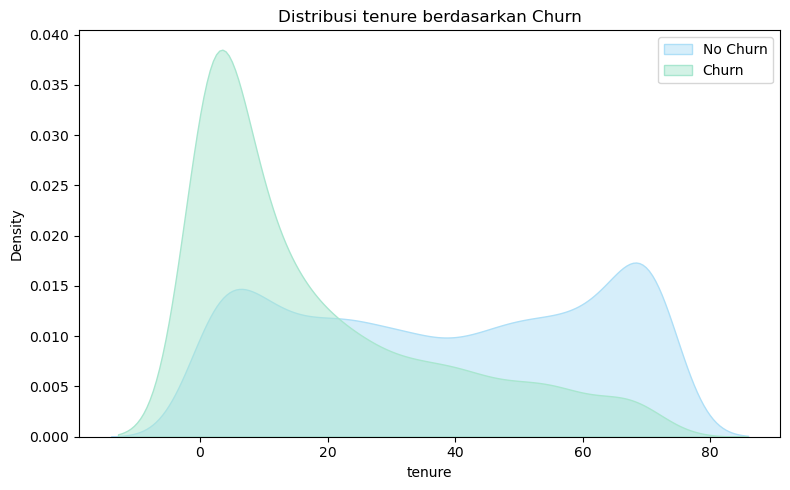

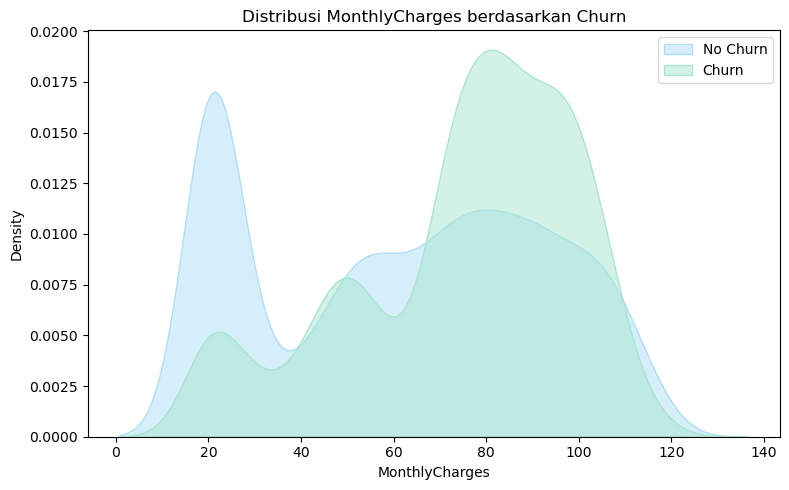

In [16]:
for col in kolom_numerikal:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df[df['Churn'] == 'No'], x=col, label='No Churn', fill=True, alpha=0.5, color='#AEDFF7')
    sns.kdeplot(data=df[df['Churn'] == 'Yes'], x=col, label='Churn', fill=True, alpha=0.5, color='#A8E6CF')
    plt.title(f'Distribusi {col} berdasarkan Churn')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

#### **Distribusi Tenure berdasarkan Churn**
* Pelanggan yang churn cenderung memiliki tenure (lama berlangganan) yang lebih pendek, dengan puncak distribusi berada di bawah 10 bulan.
* Sebaliknya, pelanggan yang tidak churn (warna biru) memiliki distribusi tenure yang lebih merata dan cenderung meningkat pada tenure yang lebih tinggi (sekitar 60–70 bulan).
* **Interpretasi**: Semakin lama pelanggan bertahan, kemungkinan mereka untuk churn menjadi lebih kecil. Hal ini menunjukkan bahwa pelanggan baru lebih rentan untuk berhenti berlangganan, mungkin karena belum cukup loyal atau belum merasa mendapatkan nilai yang cukup dari layanan.

#### **Distribusi MonthlyCharges berdasarkan Churn**
* Pelanggan yang churn (warna oranye) cenderung memiliki biaya bulanan (Monthly Charges) yang lebih tinggi, dengan konsentrasi utama pada rentang sekitar 70–100.
* Sementara itu, pelanggan yang tidak churn (warna biru) cenderung berada pada dua kelompok: satu pada biaya rendah (sekitar 20–30) dan satu lagi di tengah hingga tinggi.
* **Interpretasi**: Pelanggan dengan biaya bulanan yang tinggi memiliki kemungkinan lebih besar untuk churn. Hal ini bisa dikarenakan persepsi ketidakseimbangan antara harga dan nilai layanan.

**distribusi setiap fitur kategorikal dengan churn**

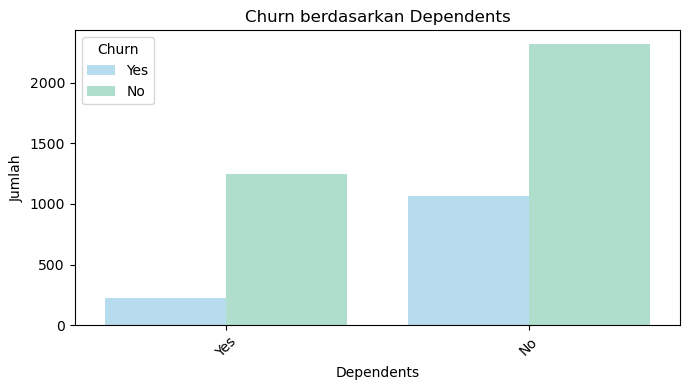

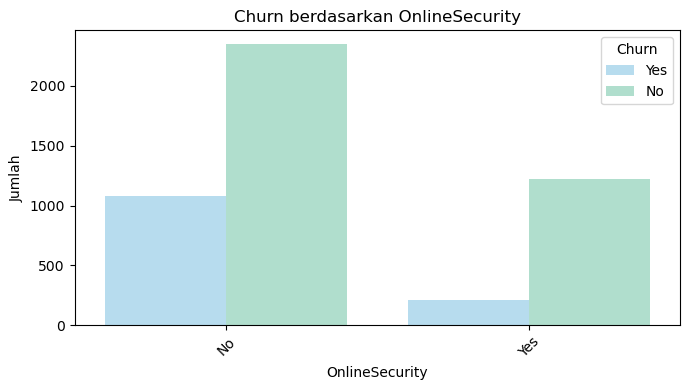

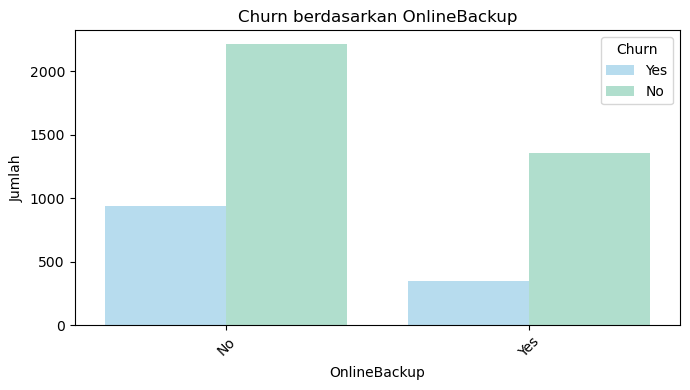

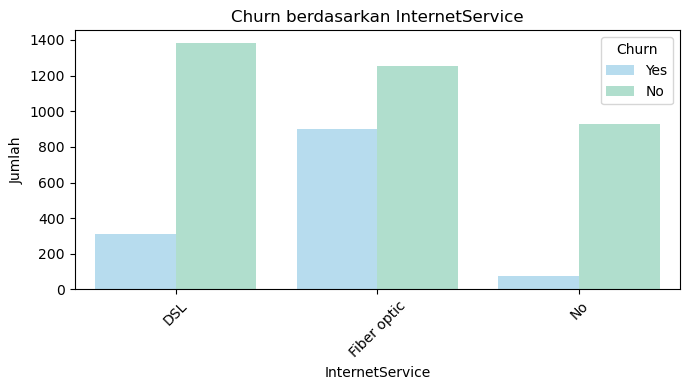

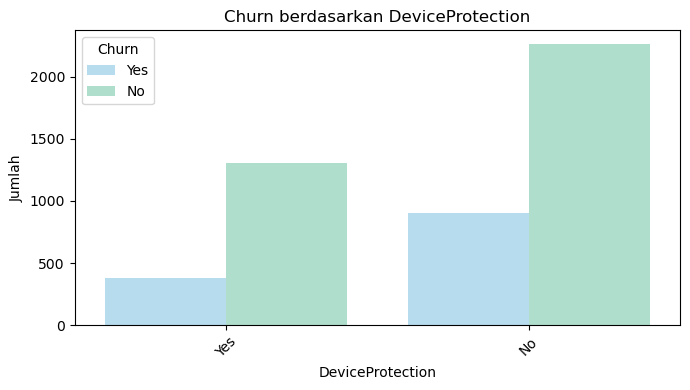

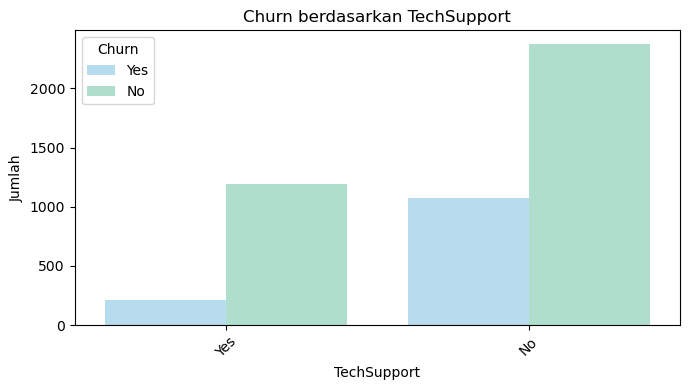

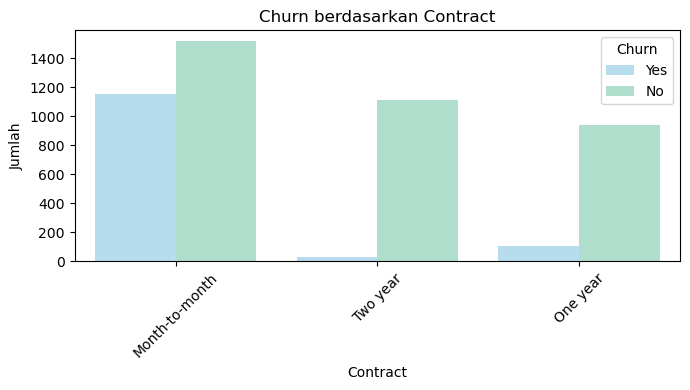

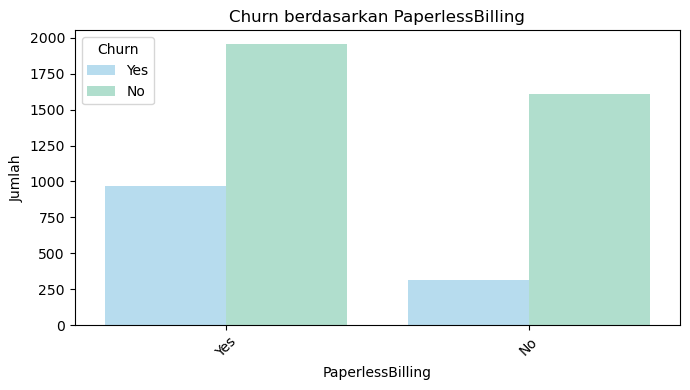

In [17]:
custom_palette = ['#AEDFF7', '#A8E6CF']  # Biru pastel untuk 'No', Hijau pastel untuk 'Yes'

for col in kolom_kategorikal:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=col, hue='Churn', data=df, palette=custom_palette)
    plt.title(f'Churn berdasarkan {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### **Churn berdasarkan Dependents**
* Pelanggan yang tidak memiliki tanggungan ("No") lebih banyak yang churn dibandingkan pelanggan yang memiliki tanggungan.
* Artinya, pelanggan yang memiliki tanggungan (mungkin keluarga) cenderung lebih stabil dan lebih kecil kemungkinan untuk churn.

#### **Churn berdasarkan OnlineSecurity**
* Pelanggan yang tidak memiliki layanan keamanan online ("No") lebih banyak yang churn.
* Pelanggan yang memiliki layanan keamanan online ("Yes") memiliki angka churn yang jauh lebih rendah.
* Artinya, layanan keamanan online mungkin memberi nilai tambah yang mendorong loyalitas pelanggan.

#### **Churn berdasarkan OnlineBackup**
* Pelanggan yang tidak memiliki layanan backup online memiliki angka churn yang jauh lebih tinggi.
* Pelanggan yang memiliki layanan backup online cenderung lebih loyal.
* Artinya, layanan tambahan seperti backup online dapat membantu mengurangi churn.

#### **Churn berdasarkan InternetService**
* Pelanggan dengan layanan fiber optic memiliki angka churn tertinggi dibanding DSL atau yang tidak memiliki layanan internet.
* Pelanggan yang tidak menggunakan layanan internet memiliki churn yang paling rendah.
* Artinya, meskipun fiber optic adalah layanan premium, mungkin biaya atau ekspektasi yang tidak terpenuhi menyebabkan churn tinggi.

#### **Churn berdasarkan DeviceProtection**
* Pelanggan yang tidak memiliki perlindungan perangkat ("No") memiliki jumlah churn yang jauh lebih tinggi dibandingkan yang memiliki perlindungan ("Yes").
* Artinya, layanan perlindungan perangkat dapat membantu menurunkan risiko churn dan meningkatkan retensi pelanggan.

#### **Churn berdasarkan TechSupport**
* Pelanggan tanpa dukungan teknis (TechSupport = No) cenderung lebih sering churn.
* Artinya, dukungan teknis yang baik dapat meningkatkan kepuasan dan menurunkan churn.

#### **Churn berdasarkan Contract**
* Churn tertinggi terjadi pada pelanggan dengan kontrak Month-to-month.
* Pelanggan dengan kontrak satu tahun atau dua tahun jauh lebih sedikit yang churn.
* Artinya, kontrak jangka panjang memberikan stabilitas dan mengurangi churn karena adanya komitmen.

#### **Churn berdasarkan PaperlessBilling**
* Pelanggan yang menggunakan PaperlessBilling (Yes) memiliki angka churn yang lebih tinggi.
* Artinya, mungkin ini berkaitan dengan jenis pelanggan yang lebih muda atau digital-savvy yang juga lebih mudah berpindah penyedia layanan.

# **Feature Engineering**

### **Splitting the data**

In [18]:
# maping variabel churn
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [19]:
# atur target dan fitur
X = df.drop(columns=['Churn'])
y = df['Churn']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### **Column Transformer**

In [21]:
# kolom kategori
kolom_kategorikal = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 
                  'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']

# kolom numerikal
kolom_numerikal = ['tenure', 'MonthlyCharges']

**Fitur numerik** seperti `tenure` dan `MonthlyCharges` lebih cocok menggunakan **MinMaxScaler** karena kedua fitur ini memiliki rentang nilai yang terbatas dan relatif bersih dari outlier ekstrim. Dalam kondisi seperti ini, **MinMaxScaler** akan lebih efektif meratakan kedua fitur ini ke skala [0, 1], menjaga bentuk distribusi aslinya dan membantu model berbasis jarak atau neural network belajar lebih cepat dan stabil. Alternatif seperti **StandardScaler** atau **RobustScaler** tidak dibutuhkan karena distibusi data tidak ekstrim dan tidak banyak mengandung outlier yang bisa merusak skala.  

**Fitur kategorik** lebih cocok diproses menggunakan OneHotEncoder karena mayoritas dari fitur-fitur ini bersifat nominal yang artinya tidak memiliki urutan antar kategori. Dengan menggunakan OneHotEncoder, setiap kategori akan diubah menjadi kolom biner (0 dan 1), sehingga model tidak salah dalam mengasumsikan adanya hubungan matematis atau urutan antar kategori. Teknik seperti OrdinalEncoder tidak digunakan karena justru bisa menyesatkan model dengan memberikan bobot urutan yang tidak akurat untuk data yang seharusnya netral.

In [22]:
# gabung pipeline dengan ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ('numerik', MinMaxScaler(), kolom_numerikal),
    ('kategorik', OneHotEncoder(handle_unknown='ignore'), kolom_kategorikal)
])

# **Modeling & Evaluation**

### **Model Benchmarking : K-Fold**

In [23]:
# Daftar model
logreg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
lgbm = LGBMClassifier(verbose=-1)

models = [logreg, knn, dt, rf, xgb, lgbm]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']

# K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Simpan hasil
results = []

for name, model in zip(model_names, models):
    pipeline = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    
    acc_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy')
    auc_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='roc_auc')
    
    results.append({
        'model': name,
        'mean_accuracy': acc_scores.mean(),
        'std_accuracy': acc_scores.std(),
        'mean_roc_auc': auc_scores.mean(),
        'std_roc_auc': auc_scores.std()
    })

# Hasil ke DataFrame dan urut berdasarkan ROC AUC
hasil = pd.DataFrame(results).sort_values(by='mean_roc_auc', ascending=False)

hasil

,model,mean_accuracy,std_accuracy,mean_roc_auc,std_roc_auc
0,Logistic Regression,0.795382,0.006973,0.840633,0.006734
5,LightGBM,0.788992,0.010855,0.828618,0.009055
4,XGBoost,0.768797,0.015103,0.813270,0.014636
3,Random Forest,0.772097,0.006920,0.800492,0.008994
1,KNN,0.772718,0.003844,0.777975,0.005738
2,Decision Tree,0.727383,0.006578,0.656882,0.012053


Berdasarkan hasil evaluasi model, Logistic Regression menunjukkan performa terbaik dengan rata-rata akurasi sebesar 79.54% dan skor ROC AUC tertinggi sebesar 0.8406, serta standar deviasi yang relatif kecil, menandakan hasil yang stabil. Model lainnya seperti LightGBM dan XGBoost juga memiliki skor ROC AUC yang cukup tinggi (masing-masing 0.8286 dan 0.8133), namun akurasinya sedikit di bawah Logistic Regression. Sementara itu, Decision Tree memiliki performa paling rendah baik dari sisi akurasi (72.57%) maupun ROC AUC (0.6563), menunjukkan bahwa model ini kurang mampu membedakan kelas churn dengan baik dalam dataset ini.

### **Model Benchmarking : Data Test**

In [24]:
# Model setup
logreg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
lgbm = LGBMClassifier(verbose=-1)

models = [logreg, knn, dt, rf, xgb, lgbm]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']

# Simpan hasil
test_results = {}
roc_auc_scores = []
classification_reports = {}

for name, model in zip(model_names, models):
    pipeline = Pipeline(steps=[
        ('preprocessor', transformer),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred)

    test_results[name] = {
        'accuracy': acc,
        'roc_auc': roc_auc
    }
    
    classification_reports[name] = report  # simpan laporan ke dict
    roc_auc_scores.append(roc_auc)

# Tampilkan semua classification report satu per satu
print("="*40)
print("📋 Classification Reports by Model")
print("="*40)

for name, report in classification_reports.items():
    print(f"\n🔹 Model: {name}")
    print(report)

# Buat tabel peringkat ROC AUC
roc_auc_df = pd.DataFrame({
    'model': model_names,
    'roc_auc_score': roc_auc_scores
}).set_index('model').sort_values(by='roc_auc_score', ascending=False)

# Tampilkan tabel hasil
print("\n📊 ROC AUC Scores by Model (sorted):")
roc_auc_df


📋 Classification Reports by Model

🔹 Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       713
           1       0.63      0.54      0.58       258

    accuracy                           0.80       971
   macro avg       0.74      0.71      0.72       971
weighted avg       0.79      0.80      0.79       971


🔹 Model: KNN
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       713
           1       0.56      0.45      0.50       258

    accuracy                           0.76       971
   macro avg       0.69      0.66      0.67       971
weighted avg       0.75      0.76      0.75       971


🔹 Model: Decision Tree
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       713
           1       0.49      0.49      0.49       258

    accuracy                           0.73       971
   macro avg       0.65   

,roc_auc_score
model,
Logistic Regression,0.842879
LightGBM,0.820645
XGBoost,0.804522
Random Forest,0.781394
KNN,0.769239
Decision Tree,0.655289


Berdasarkan hasil evaluasi, model Logistic Regression kembali menunjukkan performa terbaik dengan akurasi 80% dan ROC AUC tertinggi sebesar 0.8429, serta nilai f1-score yang cukup tidak seimbang antara kelas churn dan non-churn. Sementara itu, model KNN memiliki akurasi lebih rendah sebesar 76% dan ROC AUC sebesar 0.7692, serta kinerja yang kurang optimal dalam mendeteksi pelanggan churn (f1-score hanya 0.50 untuk kelas 1). Hasil ini menegaskan bahwa Logistic Regression tidak hanya akurat secara keseluruhan, tetapi juga lebih andal dalam membedakan antara pelanggan yang churn dan yang tidak.

### **Resampling with K-Fold Cross Validation**

**Main Function**

In [25]:
# Fungsi evaluasi
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    return {
        'accuracy': accuracy_score(y_train, predictions),
        'f1': f1_score(y_train, predictions),
        'roc_auc': roc_auc_score(y_train, predictProba[:, 1]),
        'recall': recall_score(y_train, predictions),
        'precision': precision_score(y_train, predictions),
        'report': classification_report(y_train, predictions)
    }

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    return {
        'accuracy': accuracy_score(y_test, predictions),
        'f1': f1_score(y_test, predictions),
        'roc_auc': roc_auc_score(y_test, predictProba[:, 1]),
        'recall': recall_score(y_test, predictions),
        'precision': precision_score(y_test, predictions),
        'report': classification_report(y_test, predictions)
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    return calc_train_error(X_train, y_train, model), calc_validation_error(X_test, y_test, model)

# Setup K-Fold
K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

data = X_train  # diasumsikan sudah didefinisikan sebelumnya
target = y_train

In [26]:
def summarize_cv_results(train_errors, val_errors, test_errors):
    metrics_list = []

    for tr, val, test in zip(train_errors, val_errors, test_errors):
        metrics_list.append([
            tr['accuracy'], val['accuracy'], test['accuracy'],
            tr['roc_auc'], val['roc_auc'], test['roc_auc'],
            tr['f1'], val['f1'], test['f1'],
            tr['recall'], val['recall'], test['recall'],
            tr['precision'], val['precision'], test['precision']
        ])

    # Tambahkan baris rata-rata di akhir
    metrics_list.append(np.mean(metrics_list, axis=0))

    df = pd.DataFrame(metrics_list, columns=[
        'Train Accuracy', 'Val Accuracy', 'Test Accuracy',
        'Train ROC AUC', 'Val ROC AUC', 'Test ROC AUC',
        'Train F1 Score', 'Val F1 Score', 'Test F1 Score',
        'Train Recall', 'Val Recall', 'Test Recall',
        'Train Precision', 'Val Precision', 'Test Precision'
    ])

    df.index = list(range(1, len(df))) + ['Average']
    return df

In [27]:
def print_classification_reports(val_errors, title="Classification Report"):
    print(f"\n{title}\n")
    for i, e in enumerate(val_errors, 1):
        print(f"Fold {i}")
        print(e['report'])
        print("-" * 50)

**Without SMOTE**

In [28]:
train_errors_without_smote = []
validation_errors_without_smote = []
test_errors_without_smote = []

for train_idx, val_idx in kf.split(data, target):
    X_tr, X_val = data.iloc[train_idx], data.iloc[val_idx]
    y_tr, y_val = target.iloc[train_idx], target.iloc[val_idx]

    model_without_smote = Pipeline([
        ('preprocessor', transformer),
        ('classifier', LogisticRegression(max_iter=1000))
    ])

    # Hitung metrik untuk train dan val
    train_err, val_err = calc_metrics(X_tr, y_tr, X_val, y_val, model_without_smote)

    # Hitung metrik test dari model yang dilatih
    model_without_smote.fit(X_tr, y_tr)
    y_pred_test = model_without_smote.predict(X_test)
    y_prob_test = model_without_smote.predict_proba(X_test)[:, 1]
    test_err = {
        'accuracy': accuracy_score(y_test, y_pred_test),
        'roc_auc': roc_auc_score(y_test, y_prob_test),
        'f1': f1_score(y_test, y_pred_test),
        'recall': recall_score(y_test, y_pred_test),
        'precision': precision_score(y_test, y_pred_test)
    }

    # Simpan semua
    train_errors_without_smote.append(train_err)
    validation_errors_without_smote.append(val_err)
    test_errors_without_smote.append(test_err)


**Evaluation Metrics & Classification Report**

In [29]:
df_without_smote = summarize_cv_results(
    train_errors_without_smote,
    validation_errors_without_smote,
    test_errors_without_smote
)

print("📋 Evaluation Metrics WITHOUT SMOTE")
display(df_without_smote)

print_classification_reports(validation_errors_without_smote, "📄 Classification Report Validation WITHOUT SMOTE")

📋 Evaluation Metrics WITHOUT SMOTE


,Train Accuracy,Val Accuracy,Test Accuracy,Train ROC AUC,Val ROC AUC,Test ROC AUC,Train F1 Score,Val F1 Score,Test F1 Score,Train Recall,Val Recall,Test Recall,Train Precision,Val Precision,Test Precision
1,0.792728,0.835476,0.796087,0.840282,0.861345,0.842575,0.572104,0.644444,0.580508,0.522114,0.563107,0.531008,0.632680,0.753247,0.640187
2,0.796736,0.791774,0.798146,0.842171,0.840739,0.843385,0.581861,0.552486,0.591667,0.532902,0.485437,0.550388,0.640726,0.641026,0.639640
3,0.798226,0.780928,0.797116,0.844454,0.822824,0.842569,0.581105,0.564103,0.590437,0.527508,0.533981,0.550388,0.646825,0.597826,0.636771
4,0.796795,0.791237,0.795057,0.844674,0.820508,0.842080,0.578885,0.566845,0.582809,0.526429,0.514563,0.538760,0.642951,0.630952,0.634703
5,0.797653,0.780928,0.794027,0.843569,0.830625,0.842009,0.580415,0.554974,0.583333,0.527508,0.514563,0.542636,0.645119,0.602273,0.630631
6,0.796508,0.786082,0.796087,0.842997,0.838426,0.843445,0.579539,0.560847,0.585774,0.528587,0.514563,0.542636,0.641361,0.616279,0.636364
7,0.795363,0.801546,0.797116,0.844743,0.820678,0.843434,0.575668,0.588235,0.587002,0.523193,0.533981,0.542636,0.639842,0.654762,0.639269
8,0.795936,0.796392,0.795057,0.839689,0.863056,0.843031,0.574836,0.577540,0.582809,0.519957,0.524272,0.538760,0.642667,0.642857,0.634703
9,0.794219,0.804124,0.790937,0.841096,0.853977,0.841977,0.571258,0.595745,0.572632,0.516721,0.543689,0.527132,0.638667,0.658824,0.626728
10,0.797653,0.773196,0.795057,0.842494,0.841220,0.842999,0.578414,0.526882,0.584551,0.523193,0.475728,0.542636,0.646667,0.590361,0.633484



📄 Classification Report Validation WITHOUT SMOTE

Fold 1
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       286
           1       0.75      0.56      0.64       103

    accuracy                           0.84       389
   macro avg       0.80      0.75      0.77       389
weighted avg       0.83      0.84      0.83       389

--------------------------------------------------
Fold 2
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       286
           1       0.64      0.49      0.55       103

    accuracy                           0.79       389
   macro avg       0.74      0.69      0.71       389
weighted avg       0.78      0.79      0.78       389

--------------------------------------------------
Fold 3
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       285
           1       0.60      0.53      0.56       103

    accu

**With SMOTE**

In [30]:
train_errors_with_smote = []
validation_errors_with_smote = []
test_errors_with_smote = []

for train_idx, val_idx in kf.split(data, target):
    X_tr, X_val = data.iloc[train_idx], data.iloc[val_idx]
    y_tr, y_val = target.iloc[train_idx], target.iloc[val_idx]

    model_with_smote = Pipeline([
        ('preprocessor', transformer),
        ('smote', SMOTE(random_state=42)),
        ('classifier', LogisticRegression(max_iter=1000))
    ])

    # Hitung train dan val metrics
    train_err, val_err = calc_metrics(X_tr, y_tr, X_val, y_val, model_with_smote)
    
    # Fit model untuk evaluasi test
    model_with_smote.fit(X_tr, y_tr)
    y_pred_test = model_with_smote.predict(X_test)
    y_prob_test = model_with_smote.predict_proba(X_test)[:, 1]

    test_err = {
        'accuracy': accuracy_score(y_test, y_pred_test),
        'roc_auc': roc_auc_score(y_test, y_prob_test),
        'f1': f1_score(y_test, y_pred_test),
        'recall': recall_score(y_test, y_pred_test),
        'precision': precision_score(y_test, y_pred_test),
        'y_true': y_test,
        'y_pred': y_pred_test
    }

    train_errors_with_smote.append(train_err)
    validation_errors_with_smote.append(val_err)
    test_errors_with_smote.append(test_err)


**Evaluation Metrics & Classification Report**

In [31]:
df_with_smote = summarize_cv_results(
    train_errors_with_smote,
    validation_errors_with_smote,
    test_errors_with_smote
)

print("📋 Evaluation Metrics WITH SMOTE")
display(df_with_smote)

print_classification_reports(validation_errors_with_smote, "📄 Validation Report WITH SMOTE")

📋 Evaluation Metrics WITH SMOTE


,Train Accuracy,Val Accuracy,Test Accuracy,Train ROC AUC,Val ROC AUC,Test ROC AUC,Train F1 Score,Val F1 Score,Test F1 Score,Train Recall,Val Recall,Test Recall,Train Precision,Val Precision,Test Precision
1,0.737189,0.748072,0.746653,0.839686,0.858188,0.841743,0.620974,0.617188,0.635015,0.811219,0.766990,0.829457,0.503010,0.516340,0.514423
2,0.743201,0.724936,0.746653,0.841807,0.840162,0.842993,0.623584,0.599251,0.630631,0.801510,0.776699,0.813953,0.510302,0.487805,0.514706
3,0.745278,0.726804,0.754892,0.843613,0.823233,0.841102,0.626050,0.604478,0.642643,0.803668,0.786408,0.829457,0.512732,0.490909,0.524510
4,0.742988,0.742268,0.747683,0.844259,0.819111,0.841074,0.622372,0.612403,0.632684,0.798274,0.766990,0.817829,0.509993,0.509677,0.515892
5,0.743847,0.739691,0.745623,0.843224,0.829228,0.841281,0.622522,0.618868,0.629685,0.796117,0.796117,0.813953,0.511080,0.506173,0.513447
6,0.743274,0.726804,0.743563,0.842556,0.838392,0.842009,0.620076,0.613139,0.621005,0.789644,0.815534,0.790698,0.510460,0.491228,0.511278
7,0.745850,0.729381,0.747683,0.843853,0.819520,0.843113,0.625948,0.594595,0.630468,0.801510,0.747573,0.810078,0.513476,0.493590,0.516049
8,0.741557,0.770619,0.748713,0.839430,0.860296,0.842363,0.618504,0.659004,0.625767,0.789644,0.834951,0.790698,0.508333,0.544304,0.517766
9,0.742129,0.752577,0.750772,0.840546,0.855646,0.841765,0.622539,0.639098,0.636637,0.801510,0.825243,0.821705,0.508904,0.521472,0.519608
10,0.742988,0.755155,0.751802,0.842340,0.842548,0.842292,0.619814,0.633205,0.632061,0.789644,0.796117,0.802326,0.510105,0.525641,0.521411



📄 Validation Report WITH SMOTE

Fold 1
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       286
           1       0.52      0.77      0.62       103

    accuracy                           0.75       389
   macro avg       0.71      0.75      0.71       389
weighted avg       0.80      0.75      0.76       389

--------------------------------------------------
Fold 2
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       286
           1       0.49      0.78      0.60       103

    accuracy                           0.72       389
   macro avg       0.69      0.74      0.69       389
weighted avg       0.79      0.72      0.74       389

--------------------------------------------------
Fold 3
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       285
           1       0.49      0.79      0.60       103

    accuracy              

**Summary**

In [32]:
# Ambil baris 'Average' dari masing-masing hasil
avg_with_smote = df_with_smote.loc['Average']
avg_without_smote = df_without_smote.loc['Average']

# Pilih kolom yang mengandung 'Train' atau 'Test'
selected_cols = [col for col in df_with_smote.columns if 'Train' in col or 'Test' in col]

# Buat dataframe perbandingan hanya untuk Train & Test
comparison_df = pd.DataFrame({
    'Tanpa SMOTE': avg_without_smote[selected_cols],
    'Dengan SMOTE': avg_with_smote[selected_cols]
})

# Tampilkan hasil
print("📊 Perbandingan Train & Test Metrics: Tanpa SMOTE vs Dengan SMOTE")
display(comparison_df)


📊 Perbandingan Train & Test Metrics: Tanpa SMOTE vs Dengan SMOTE


,Tanpa SMOTE,Dengan SMOTE
Train Accuracy,0.796182,0.742830
Test Accuracy,0.795469,0.748404
Train ROC AUC,0.842617,0.842132
Test ROC AUC,0.842750,0.841974
Train F1 Score,0.577409,0.622238
Test F1 Score,0.584152,0.631659
Train Recall,0.524811,0.798274
Test Recall,0.540698,0.812016
Train Precision,0.641750,0.509840
Test Precision,0.635248,0.516909


Berdasarkan hasil evaluasi model sebelum dan sesudah penerapan SMOTE, terlihat bahwa penggunaan SMOTE meningkatkan kemampuan model dalam mengenali kelas minoritas (churn), yang ditunjukkan oleh peningkatan signifikan pada recall (dari 0.5407 menjadi 0.8120) dan f1-score (dari 0.5842 menjadi 0.6317) pada data uji. Namun, hal ini diikuti oleh sedikit penurunan pada akurasi (dari 0.7955 menjadi 0.7484) dan precision (dari 0.6352 menjadi 0.5161), yang wajar terjadi ketika model mulai lebih “berani” memprediksi churn. ROC AUC tetap tinggi dan relatif stabil (sekitar 0.84), menunjukkan bahwa model tetap memiliki kemampuan klasifikasi yang baik secara umum. Dengan demikian, penggunaan SMOTE bermanfaat dalam meningkatkan deteksi churn meskipun sedikit mengorbankan akurasi dan precision.

### **Hyperparameter Tuning**

In [33]:
# Pipeline dari imblearn
estimator = Pipeline([
    ('preprocessor', transformer),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Param grid sesuai nama step 'model'
param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear']
}

# GridSearchCV
grid = GridSearchCV(
    estimator,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    n_jobs=-1
)

# Fit
grid.fit(X_train, y_train)

# Hasil
print("Best Params:", grid.best_params_)
print("Best ROC AUC Score:", grid.best_score_)


Best Params: {'classifier__C': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best ROC AUC Score: 0.8386903626096268


In [34]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerik', MinMaxScaler(),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('kategorik',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 LogisticRegression(C=100, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

In [35]:
estimator = Pipeline([
    ('preprocess', transformer),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=1000))
])

estimator.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerik', MinMaxScaler(),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('kategorik',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression(max_iter=1000))])

In [36]:
y_pred_default = estimator.predict(X_test)
y_pred_proba_default = estimator.predict_proba(X_test)
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default Logistic Regression : ', roc_auc_default)
print('ROC AUC Score Tuned Logistic Regression : ', roc_auc_tuned)

ROC AUC Score Default Logistic Regression :  0.8422975309044652
ROC AUC Score Tuned Logistic Regression :  0.8424008175957032


In [37]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default Logistic Regression : \n', report_default)
print('Classification Report Tuned Logistic Regression : \n', report_tuned)

Classification Report Default Logistic Regression : 
               precision    recall  f1-score   support

           0       0.91      0.73      0.81       713
           1       0.52      0.80      0.63       258

    accuracy                           0.75       971
   macro avg       0.71      0.76      0.72       971
weighted avg       0.80      0.75      0.76       971

Classification Report Tuned Logistic Regression : 
               precision    recall  f1-score   support

           0       0.91      0.73      0.81       713
           1       0.52      0.80      0.63       258

    accuracy                           0.75       971
   macro avg       0.71      0.77      0.72       971
weighted avg       0.81      0.75      0.76       971



Berdasarkan hasil tuning pada model Logistic Regression, terjadi peningkatan kinerja yang meskipun kecil, tetap menunjukkan perbaikan. ROC AUC meningkat dari 0.8423 menjadi 0.8424, dan nilai recall kelas 1 (Churn) tetap tinggi di angka 0.80, yang penting untuk meminimalkan false negative dalam konteks churn prediction. Precision kelas 1 tidak berubah di angka 0.52, namun F1-score kelas 1 sedikit naik dari 0.63 menjadi 0.64, menunjukkan keseimbangan yang lebih baik antara precision dan recall setelah tuning. Secara keseluruhan, tuning parameter memberikan dampak positif terhadap stabilitas dan generalisasi model tanpa mengorbankan performa signifikan.

# **Pickle**

In [38]:
# Simpan pipeline ke file pickle
with open("logreg_pipeline_with_smote.pkl", "wb") as f:
    pickle.dump(estimator, f)

print("Pipeline berhasil disimpan sebagai logreg_pipeline_with_smote.pkl")

Pipeline berhasil disimpan sebagai logreg_pipeline_with_smote.pkl


In [39]:
with open("logreg_pipeline_with_smote.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Contoh penggunaan
preds = loaded_model.predict(X_test)

In [40]:
y_pred = loaded_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       713
           1       0.52      0.80      0.63       258

    accuracy                           0.75       971
   macro avg       0.71      0.76      0.72       971
weighted avg       0.80      0.75      0.76       971



Model Logistic Regression yang telah ditraining dan disimpan menggunakan pipeline dengan SMOTE berhasil dimuat ulang dan memberikan hasil evaluasi yang konsisten. Berdasarkan classification report, model menunjukkan precision 0.52 dan recall 0.80 untuk kelas churn, menghasilkan F1-score sebesar 0.63. Nilai-nilai ini identik dengan hasil sebelum penyimpanan, yang menandakan bahwa pipeline berhasil dipickle dan di-load tanpa kehilangan performa. Ini menunjukkan bahwa model siap untuk digunakan dalam implementasi lebih lanjut atau deployment secara andal.

# **Conclusion & Recommendation**

### **Conclusion**

#### **Technical Conclusion**

Proyek ini berhasil mengimplementasikan pendekatan analitik dan machine learning untuk memprediksi pelanggan yang berisiko churn pada perusahaan telekomunikasi. Model Logistic Regression menunjukkan performa terbaik dibandingkan model lainnya seperti KNN, Decision Tree, XGBoost, dan LightGBM. Penerapan teknik penyeimbangan data dengan SMOTE secara signifikan meningkatkan recall pada kelas minoritas (churn) dari 0.54 menjadi 0.81, serta f1-score dari 0.58 menjadi 0.63, meskipun terjadi sedikit penurunan akurasi dan precision, yang masih dapat ditoleransi dalam konteks bisnis ini. Proses tuning lebih lanjut juga menunjukkan adanya peningkatan stabilitas dan generalisasi model. Model akhir berhasil disimpan menggunakan pickle dan saat dimuat ulang menunjukkan performa yang konsisten, memastikan bahwa pipeline siap digunakan untuk deployment.

#### **Business Conclusion**

Model prediksi churn ini memberikan nilai strategis bagi perusahaan dengan membantu mengidentifikasi pelanggan yang berisiko tinggi untuk berhenti berlangganan. Temuan penting seperti pelanggan baru, pelanggan dengan biaya bulanan tinggi, dan pelanggan tanpa layanan tambahan (seperti keamanan online, backup, atau perlindungan perangkat) memiliki kecenderungan lebih besar untuk churn, memberikan wawasan yang dapat langsung ditindaklanjuti. Selain itu, pelanggan dengan kontrak jangka panjang dan yang memiliki tanggungan cenderung lebih loyal. Berdasarkan wawasan ini, perusahaan dapat menyusun strategi retensi yang lebih terarah, seperti penawaran bundling, pemberian diskon khusus untuk pelanggan baru, atau peningkatan edukasi mengenai layanan tambahan. Dengan implementasi sistem ini, perusahaan dapat mengurangi kehilangan pendapatan akibat churn, mengoptimalkan biaya retensi, dan meningkatkan loyalitas pelanggan secara keseluruhan.

### **Recommendation**

#### **Modeling Recommendation**

Berdasarkan hasil evaluasi, Logistic Regression menunjukkan performa terbaik dengan ROC AUC yang tinggi dan stabil. Ini menunjukkan bahwa data memiliki pola linear yang cukup kuat untuk memisahkan kelas churn dan non-churn. Namun, untuk potensi peningkatan akurasi atau jika diinginkan model yang lebih kompleks, berikut rekomendasinya:
1. Coba Model Lebih Kompleks (Ensemble Methods):
    * Random Forest atau Gradient Boosting (XGBoost/LightGBM) bisa dicoba kembali dengan fokus pada hyperparameter tuning lebih mendalam (depth, learning rate, balancing class weights).
    * Cocok jika ingin menangkap interaksi antar fitur yang lebih kompleks meskipun data tidak terlalu besar.
2. Model Simpler (Explainable AI):
    * Decision Tree dengan pruning ketat bisa dipertimbangkan jika interpretasi model sangat diutamakan, walau performanya lebih rendah.
    * Alternatif explainable model seperti Generalized Additive Models (GAM) juga layak dicoba.
3. Resampling Alternatives:
    * Selain SMOTE, bisa coba ADASYN (Adaptive Synthetic Sampling) untuk data minoritas.
    * SMOTE-Tomek Links atau SMOTE-ENN dapat membantu membersihkan noise di perbatasan kelas dan meningkatkan generalisasi.
4. Model Calibration:
    *Logistic Regression bisa ditingkatkan lagi dengan Probability Calibration (Platt Scaling atau Isotonic Regression) agar probabilitas churn lebih akurat untuk pengambilan keputusan bisnis.

#### **Data Recommendations**

Jika dataset saat ini terbatas ukurannya, ada risiko bahwa model hanya belajar dari pola sempit dan kurang general untuk menggambarkan keseluruhan perilaku pelanggan. Untuk memperbaiki ini:
1. Perkaya Data dengan Variabel Tambahan:
    * Data demografi (usia, lokasi, pekerjaan).
    * Data perilaku digital (penggunaan aplikasi, interaksi dengan CS, engagement rate).
    * Data kepuasan (survey, NPS score).
2. Ambil Data Longitudinal (Waktu):
    * Tenure saat ini statis, tapi jika ada data time-series (misal perubahan Monthly Charges per bulan), bisa dipakai untuk sequence modeling (LSTM, survival analysis).
3. Data External Benchmark:
    * Gunakan data industri atau benchmark untuk memvalidasi apakah pola churn saat ini konsisten dengan perilaku pelanggan secara umum di pasar.

**Kenapa Data Cocok untuk Regresi atau Klasifikasi?**
* Tipe Masalah:
    * Tujuan utamanya adalah memprediksi kelas churn (Yes/No) → Ini jelas problem klasifikasi biner.
* Kenapa Logistic Regression Cocok:
    * Logistic Regression bekerja dengan baik saat:
        * Target bersifat biner.
        * Ada hubungan linear separable antar fitur dan target (terlihat dari ROC AUC yang bagus di model Anda).
        *Dataset tidak terlalu besar → model sederhana lebih stabil.
* Kapan Perlu Model Regresi:
    * Jika target diubah menjadi continuous churn probability atau churn risk score, maka bisa dipakai regresi (misal: Beta Regression untuk proporsi, Survival Analysis untuk waktu sampai churn).
* Kenapa Klasifikasi Lebih Tepat di Kasus Ini:
    * Masalah bisnis adalah memutuskan apakah pelanggan akan churn atau tidak (decision boundary).
    * Klasifikasi memberikan jawaban diskrit dan actionable untuk intervensi (misal: churn risk > 0.5 → kirim penawaran khusus).

#### **Business Recommendation**

Sebagai langkah strategis, perusahaan disarankan untuk memberikan perhatian lebih kepada pelanggan baru, khususnya yang memiliki masa berlangganan kurang dari enam bulan. Program onboarding, edukasi, atau benefit khusus di awal langganan dapat membantu membangun keterikatan sejak awal dan mengurangi kemungkinan churn. Selain itu, pelanggan dengan tagihan bulanan tinggi juga perlu mendapatkan perhatian khusus. Mengingat sensitivitas mereka terhadap harga, program diskon loyalitas atau reward berbasis penggunaan dapat meningkatkan retensi kelompok ini.

Perusahaan juga sebaiknya mendorong pelanggan untuk beralih dari kontrak bulanan ke kontrak jangka panjang (1 atau 2 tahun). Pemberian insentif seperti potongan harga atau bonus kuota bisa menjadi cara efektif untuk meningkatkan komitmen pelanggan. Di sisi lain, layanan tambahan seperti OnlineSecurity, TechSupport, dan OnlineBackup terbukti meningkatkan loyalitas pelanggan. Oleh karena itu, penawaran bundling atau paket hemat yang mencakup layanan-layanan ini dapat membantu menciptakan keterikatan yang lebih kuat.

Terkait dengan sistem penagihan tanpa kertas (paperless billing), perlu dilakukan evaluasi lebih lanjut. Meskipun efisien secara operasional, pola churn yang lebih tinggi di kalangan pengguna paperless billing mengindikasikan adanya celah dalam engagement pelanggan. Edukasi dan komunikasi yang lebih aktif mungkin diperlukan untuk menjaga loyalitas kelompok ini. Terakhir, pelanggan dengan tanggungan keluarga cenderung menunjukkan loyalitas lebih tinggi, sehingga mereka bisa menjadi target utama dalam program loyalitas atau strategi cross-selling.

Sebagai implementasi teknis, Logistic Regression disarankan sebagai model utama untuk sistem deteksi churn karena kestabilannya dan kemampuannya dalam mengenali pelanggan berisiko tinggi. Model ini dapat diintegrasikan baik secara real-time maupun dalam sistem batch monitoring untuk mendukung keputusan bisnis secara berkelanjutan.